In [142]:
import pandas as pd
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [143]:
# Read the Well files
data = pd.read_csv("well1/well1_pason.csv")

In [144]:
data.head()

,Hole Depth,Bit Depth,On Bottom,On Bottom Hours,On Bottom ROP,Mechanical Specific Energy,Block Height,Hook Load,Trip Speed,Weight on Bit,...,Gravity Toolface,Rig Sub State,Bit Depth.1,MWD Continuous Azi,MWD Continuous Inc,MWD TEMP (deg),Rate Of Penetration,Time Of Penetration,YYYY/MM/DD,HH:MM:SS
0,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:30
1,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:40
2,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:50
3,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.2,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:32:00
4,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.2,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:32:10


In [145]:
headers = [
   'Hole Depth',
   'Bit Depth',
 #  'On Bottom',
 #  'On Bottom Hours',
 #  'On Bottom ROP',
 #  'Mechanical Specific Energy',
 #  'Block Height',
   'Hook Load',
 #  'Trip Speed',
   'Weight on Bit',
 #  'Differential Pressure',
 #  'Rotary RPM',
 #  'Rotary Torque',
 #  'Total Pump Output',
 #  'Standpipe Pressure',
   'Gamma',
 #  'Inclination',
 #  'Azimuth',
 #  'Tool Face',
 #  'Magnetic Toolface',
   'Gravity Toolface',
 #  'Rig Sub State',
 #  'Bit Depth',
 #  'MWD Continuous Azi',
 #  'MWD Continuous Inc',
 #  'MWD TEMP (deg)',
   'Rate Of Penetration',
   'Time Of Penetration',
   'YYYY/MM/DD',
   'HH:MM:SS'
]

In [146]:
data = pd.read_csv(
    "well1/well1_pason.csv", skipinitialspace=True, usecols=headers, low_memory=False,
    index_col=0
)

In [147]:
data.info

<bound method DataFrame.info of             Bit Depth  Hook Load  Weight on Bit   Gamma  Gravity Toolface  \
Hole Depth                                                                  
5565.0        5555.28       16.3            0.0 -999.25            134.75   
5565.0        5555.28       16.3            0.0 -999.25            134.75   
5565.0        5555.28       16.3            0.0 -999.25            134.75   
5565.0        5555.28       16.2            0.0 -999.25            134.75   
5565.0        5555.28       16.2            0.0 -999.25            134.75   
...               ...        ...            ...     ...               ...   
0.0              0.00        0.4            0.0 -999.25            -77.50   
0.0              0.00        0.4            0.0 -999.25            -77.50   
0.0              0.00        0.4            0.0 -999.25            -77.50   
0.0              0.00        0.4            0.0 -999.25            -77.50   
0.0              0.00        0.4            

In [148]:
data['DateTime'] = pd.to_datetime(data['YYYY/MM/DD'] + ' ' + data['HH:MM:SS'])


In [149]:
data.head()

,Bit Depth,Hook Load,Weight on Bit,Gamma,Gravity Toolface,Rate Of Penetration,Time Of Penetration,YYYY/MM/DD,HH:MM:SS,DateTime
Hole Depth,,,,,,,,,,
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023/04/03,16:31:30,2023-04-03 16:31:30
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023/04/03,16:31:40,2023-04-03 16:31:40
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023/04/03,16:31:50,2023-04-03 16:31:50
5565.0,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,2023/04/03,16:32:00,2023-04-03 16:32:00
5565.0,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,2023/04/03,16:32:10,2023-04-03 16:32:10


In [150]:
data = data.drop(['YYYY/MM/DD','HH:MM:SS'], axis=1)



In [151]:
data.head()

,Bit Depth,Hook Load,Weight on Bit,Gamma,Gravity Toolface,Rate Of Penetration,Time Of Penetration,DateTime
Hole Depth,,,,,,,,
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023-04-03 16:31:30
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023-04-03 16:31:40
5565.0,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,2023-04-03 16:31:50
5565.0,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,2023-04-03 16:32:00
5565.0,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,2023-04-03 16:32:10


In [152]:

data.set_index('DateTime', inplace=True)


In [153]:

# Resample with a 15-minute frequency
data_resample = data.resample('15T').mean()

C:\Users\gaoqian\AppData\Local\Temp\ipykernel_37180\811416577.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



In [154]:
# generate the figure
traces = list(data.columns.values)

In [155]:
fig = make_subplots(
    rows=1, cols=len(traces),
    shared_yaxes=True,
    subplot_titles=traces
)

In [156]:
for i, t in enumerate(traces):
    fig.add_trace(
        go.Scattergl(
            x=data_resample[t], y=data_resample.index,
            name=t
        ),
        col=i+1, row=1,
    )

In [157]:
fig.update_layout(
    showlegend=False,
    yaxis=dict(
        autorange='reversed'
    ),
    title_text="drilling realtime visualization",
)

# there's some rogue data in the hookload - manually set the range of the
# axis so it plots nicely
fig.layout[f"xaxis{traces.index('Hook Load')+1}"]['range'] = (
    [-200, 4e6]
)

In [158]:
fig.show()

In [159]:
import matplotlib.pyplot as plt

# Define the threshold for stability (e.g., ±5 degrees)
change_threshold = 10

# Create a new column 'Drilling State' to store labels
data['Drilling State'] = 'Unknown'
# Calculate the change in Gravity Toolface
data['Toolface Change'] = data['Gravity Toolface'].diff()

# Label rows as 'Sliding' or 'Rotating'
data.loc[abs(data['Toolface Change']) < change_threshold, 'Drilling State'] = 'Sliding'
data.loc[abs(data['Toolface Change']) >= change_threshold, 'Drilling State'] = 'Rotating'

In [160]:
data.head()

,Bit Depth,Hook Load,Weight on Bit,Gamma,Gravity Toolface,Rate Of Penetration,Time Of Penetration,Drilling State,Toolface Change
DateTime,,,,,,,,,
2023-04-03 16:31:30,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,Unknown,NaN
2023-04-03 16:31:40,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,Sliding,0.0
2023-04-03 16:31:50,5555.28,16.3,0.0,-999.25,134.75,0.0,0.0,Sliding,0.0
2023-04-03 16:32:00,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,Sliding,0.0
2023-04-03 16:32:10,5555.28,16.2,0.0,-999.25,134.75,0.0,0.0,Sliding,0.0


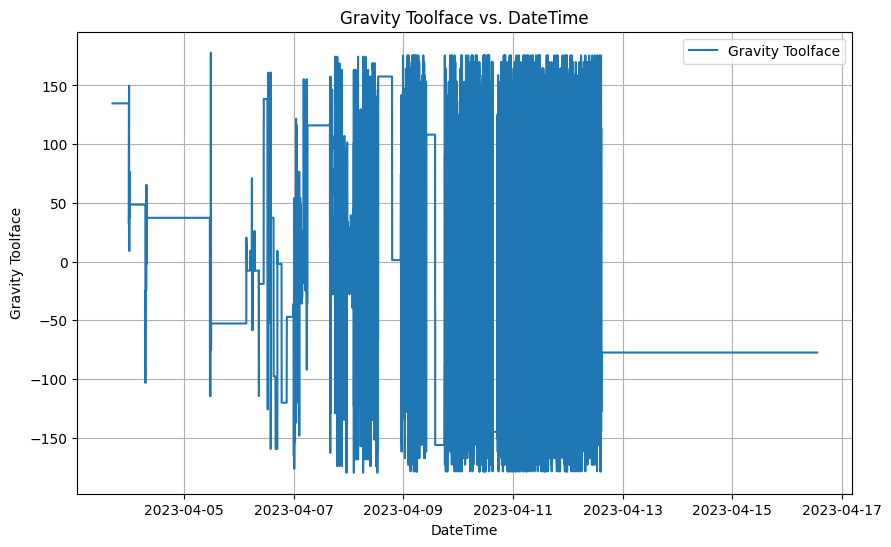

In [161]:
# Plot Gravity Toolface vs. Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Gravity Toolface'], label='Gravity Toolface')
plt.xlabel('DateTime')
plt.ylabel('Gravity Toolface')
plt.title('Gravity Toolface vs. DateTime')
plt.grid(True)
plt.legend()
plt.show()

In [162]:
import plotly.express as px
# Create an interactive plot
fig = px.line(data, x=data['DateTime'], y=data['Gravity Toolface'], title='Gravity Toolface vs. Time')
fig.update_xaxes(title_text='DateTime')
fig.update_yaxes(title_text='Gravity Toolface')

# Show the plot
fig.show()

KeyError: 'DateTime'